# Perkenalan

## Team

1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

# Latar Belakang

Dalam industri perbankan dan kartu kredit, pemahaman yang mendalam tentang perilaku pengguna kartu kredit sangat penting untuk mengembangkan strategi pemasaran yang efektif. Segmentasi pelanggan memainkan peran kunci dalam memahami kelompok-kelompok pelanggan yang berbeda dan merancang taktik pemasaran yang tepat untuk setiap kelompok. Dataset yang diberikan adalah dataset sampel yang merangkum perilaku penggunaan kartu kredit sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir.

Tujuan dari kasus ini adalah untuk mengembangkan segmentasi pelanggan yang dapat membantu dalam mengidentifikasi pola dan karakteristik perilaku pengguna kartu kredit. Dengan pemahaman yang lebih baik tentang profil pelanggan dan preferensi mereka, perusahaan dapat merancang kampanye pemasaran yang lebih personal, meningkatkan retensi pelanggan, dan mengoptimalkan penjualan produk dan layanan.

Dataset ini terdiri dari berbagai variabel perilaku pengguna kartu kredit, yang mencakup informasi seperti saldo akun, frekuensi pembelian, jumlah pembayaran, dan masa penggunaan kartu kredit. Dengan menganalisis variabel-variabel ini, kita dapat mengidentifikasi pola pembelian, preferensi pembayaran, dan durasi penggunaan kartu kredit oleh setiap pelanggan.

Dengan memanfaatkan teknik clustering, kita dapat mengelompokkan pelanggan berdasarkan perilaku dan karakteristik yang serupa. Hal ini akan membantu perusahaan dalam mengembangkan strategi pemasaran yang lebih terfokus dan memadai untuk setiap kelompok pelanggan. Misalnya, pelanggan dengan kecenderungan pembelian yang tinggi dan sering membayar penuh setiap bulan dapat diberikan penawaran spesial untuk program loyalitas, sementara pelanggan dengan pembelian yang jarang dan pembayaran minimum dapat diberikan penawaran untuk meningkatkan penggunaan kartu mereka.

Dengan demikian, analisis segmentasi pelanggan berdasarkan dataset ini dapat membantu perusahaan dalam mengoptimalkan penggunaan sumber daya pemasaran, meningkatkan retensi pelanggan, dan meningkatkan pendapatan melalui strategi yang lebih terarah dan personal.

● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Library

In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.cluster import KMeans

#scoring
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Data Loading

### Memanggil Dataset

In [2]:
df = pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Melihat ukuran data ( baris, kolom)

In [4]:
df.shape

(8950, 18)

terdapat 8950 baris dan 18 kolom pada data Credit Card

### Melihat Informasi Kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 1
Binary Categorical features Count 0


### Penjelasan Kolom

Attribute Information:
1. CUSTID - Identifikasi Pemegang Kartu Kredit (Kategori)

2. BALANCE - Jumlah saldo yang tersisa di akun untuk melakukan pembelian 

3. BALANCEFREQUENCY - Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)

4. PURCHASES - Jumlah pembelian yang dilakukan dari akun

5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan sekaligus

6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan

7. CASHADVANCE - Uang muka yang diberikan oleh pengguna

8. PURCHASESFREQUENCY - Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)

9. ONEOFFPURCHASESFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)

10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)

11. CASHADVANCEFREQUENCY - Seberapa sering pembelian dilakukan secara cicilan (1 = sering dilakukan, 0 = jarang dilakukan)

12. CASHADVANCETRX - Seberapa sering uang muka dibayarkan

13. PURCHASESTRX - Jumlah transaksi yang dilakukan dengan "Uang Muka"

14. CREDITLIMIT - Jumlah transaksi pembelian yang dilakukan

15. PAYMENTS - Batas Kartu Kredit untuk pengguna

16. MINIMUM_PAYMENTS - Jumlah pembayaran minimum yang dilakukan oleh pengguna

17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dilakukan oleh pengguna

18. TENURE - Masa penggunaan kartu kredit oleh pengguna

### Deskripsi Statistik

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Mengecek Nilai Null

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Setelah dicek, terdapat nilai null pada kolom Minimum Payments dan kolom Credit Limit

### Menghitung Persentase Nilai Null

In [9]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom CUST_ID:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom BALANCE:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom BALANCE_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom ONEOFF_PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom INSTALLMENTS_PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom CASH_ADVANCE:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom ONEOFF_PURCHASES_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES_INSTALLMENTS_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom CASH_ADVANCE_FREQUENCY:
Jumlah nilai 

### Melihat Distribusi Data yang Memiliki Nilai Null

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

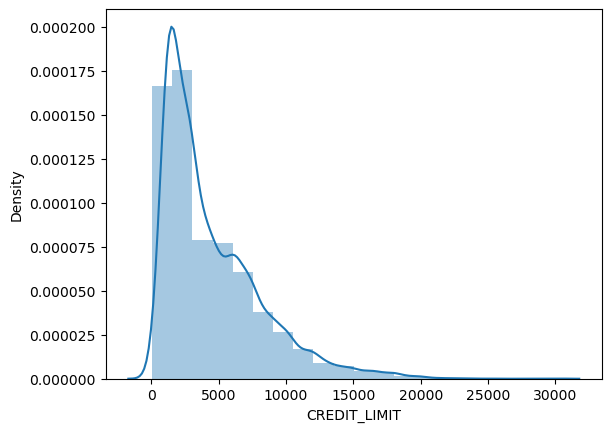

In [10]:
CreditLimitNull = sns.distplot(df['CREDIT_LIMIT'], bins=20, kde=True)
CreditLimitNull

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

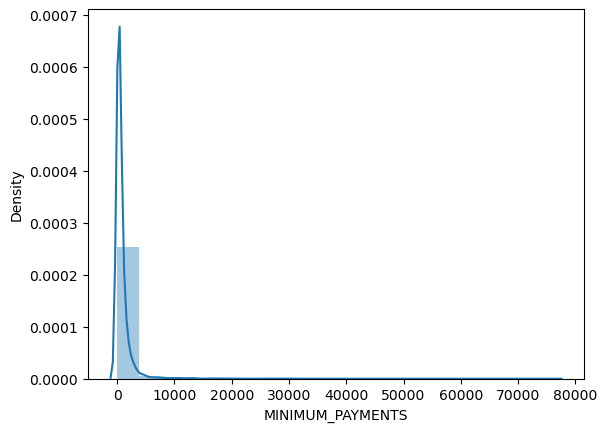

In [11]:
MinimumPaymentsNull = sns.distplot(df['MINIMUM_PAYMENTS'], bins=20, kde=True)
MinimumPaymentsNull

### Mengecek duplikat data

In [12]:
df.duplicated().sum()

0

# Data Cleansing

### Menghapus Nilai Null

Dikarenakan terdapat 2 kolom dengan nilai null yang bernilai 3.5% dari data dan 0.01% dari data, maka missing value atau nilai null akan dihapus

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df.shape

(8636, 18)

baris yang sebelumnya berjumlah 8950 baris, sekarang menjadi 8636 baris

# Exploratory Data Analysis

### Melihat Distribusi Data

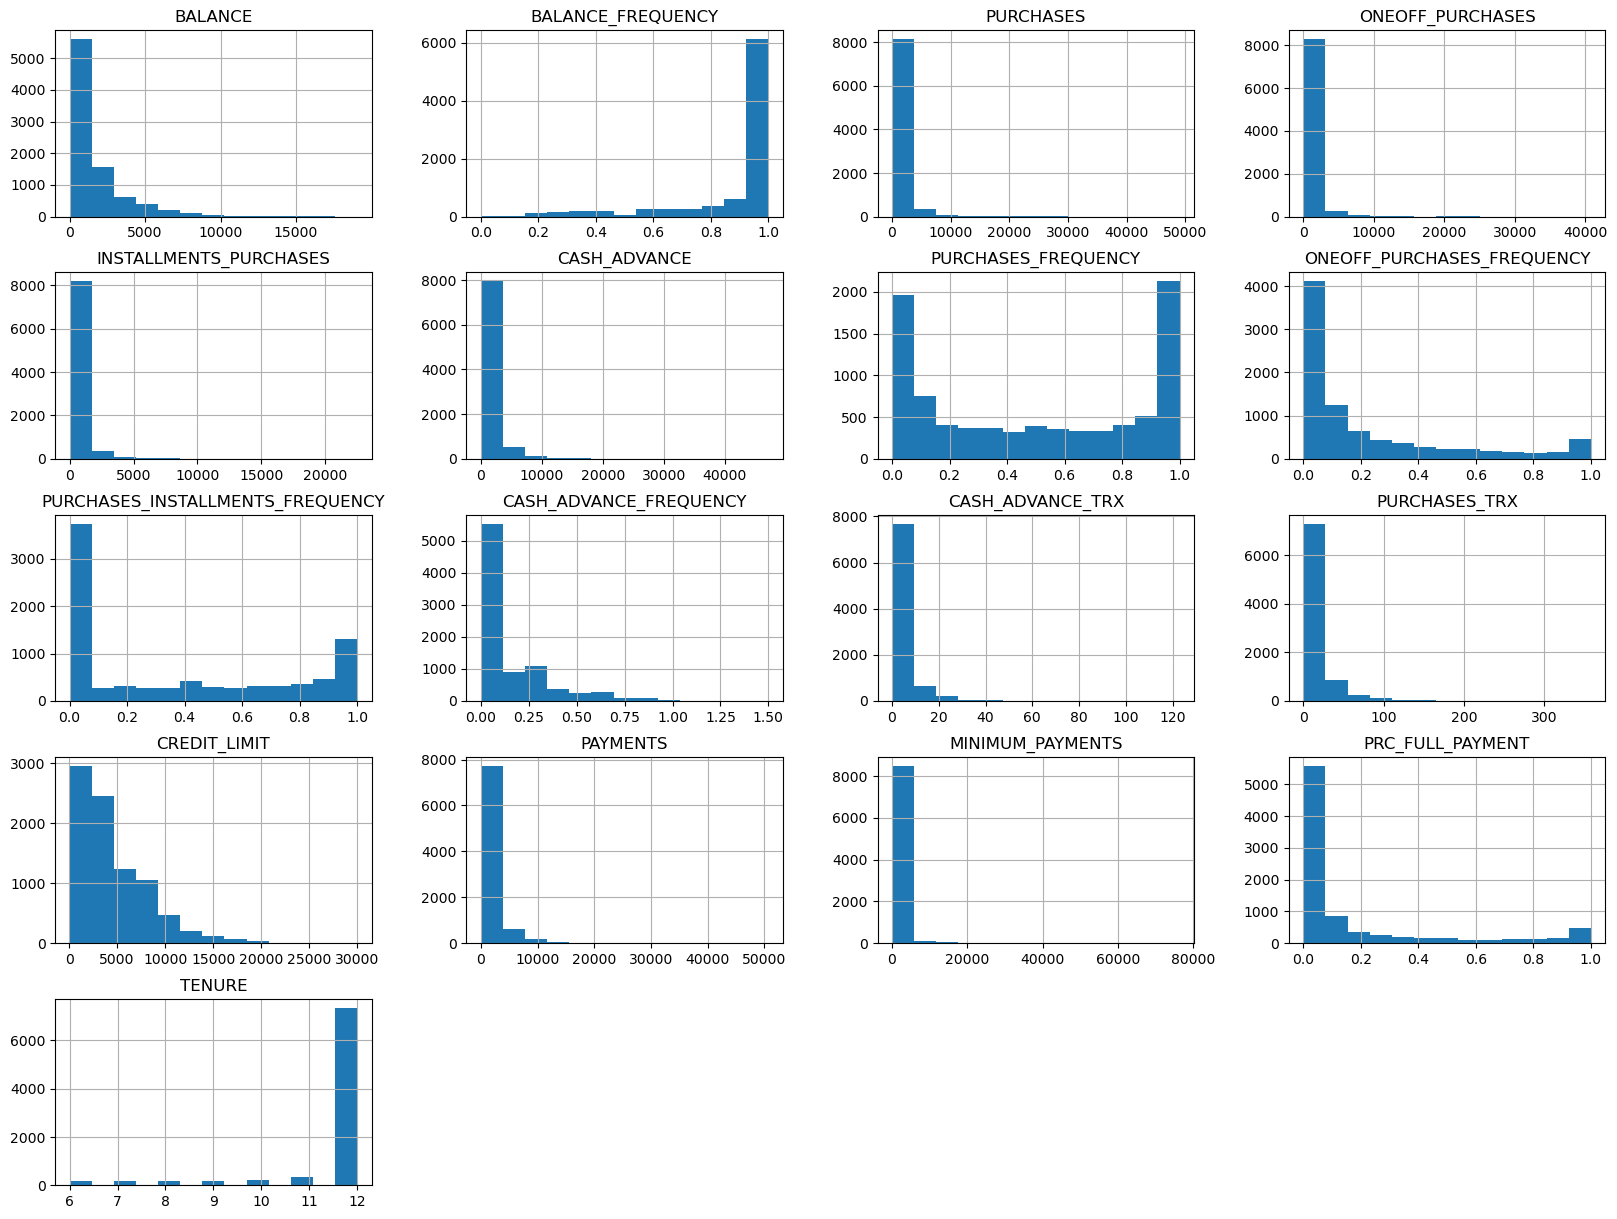

In [16]:
df.hist(bins=13, figsize=(20, 15), layout=(5, 4));

### Korelasi Data

<AxesSubplot:>

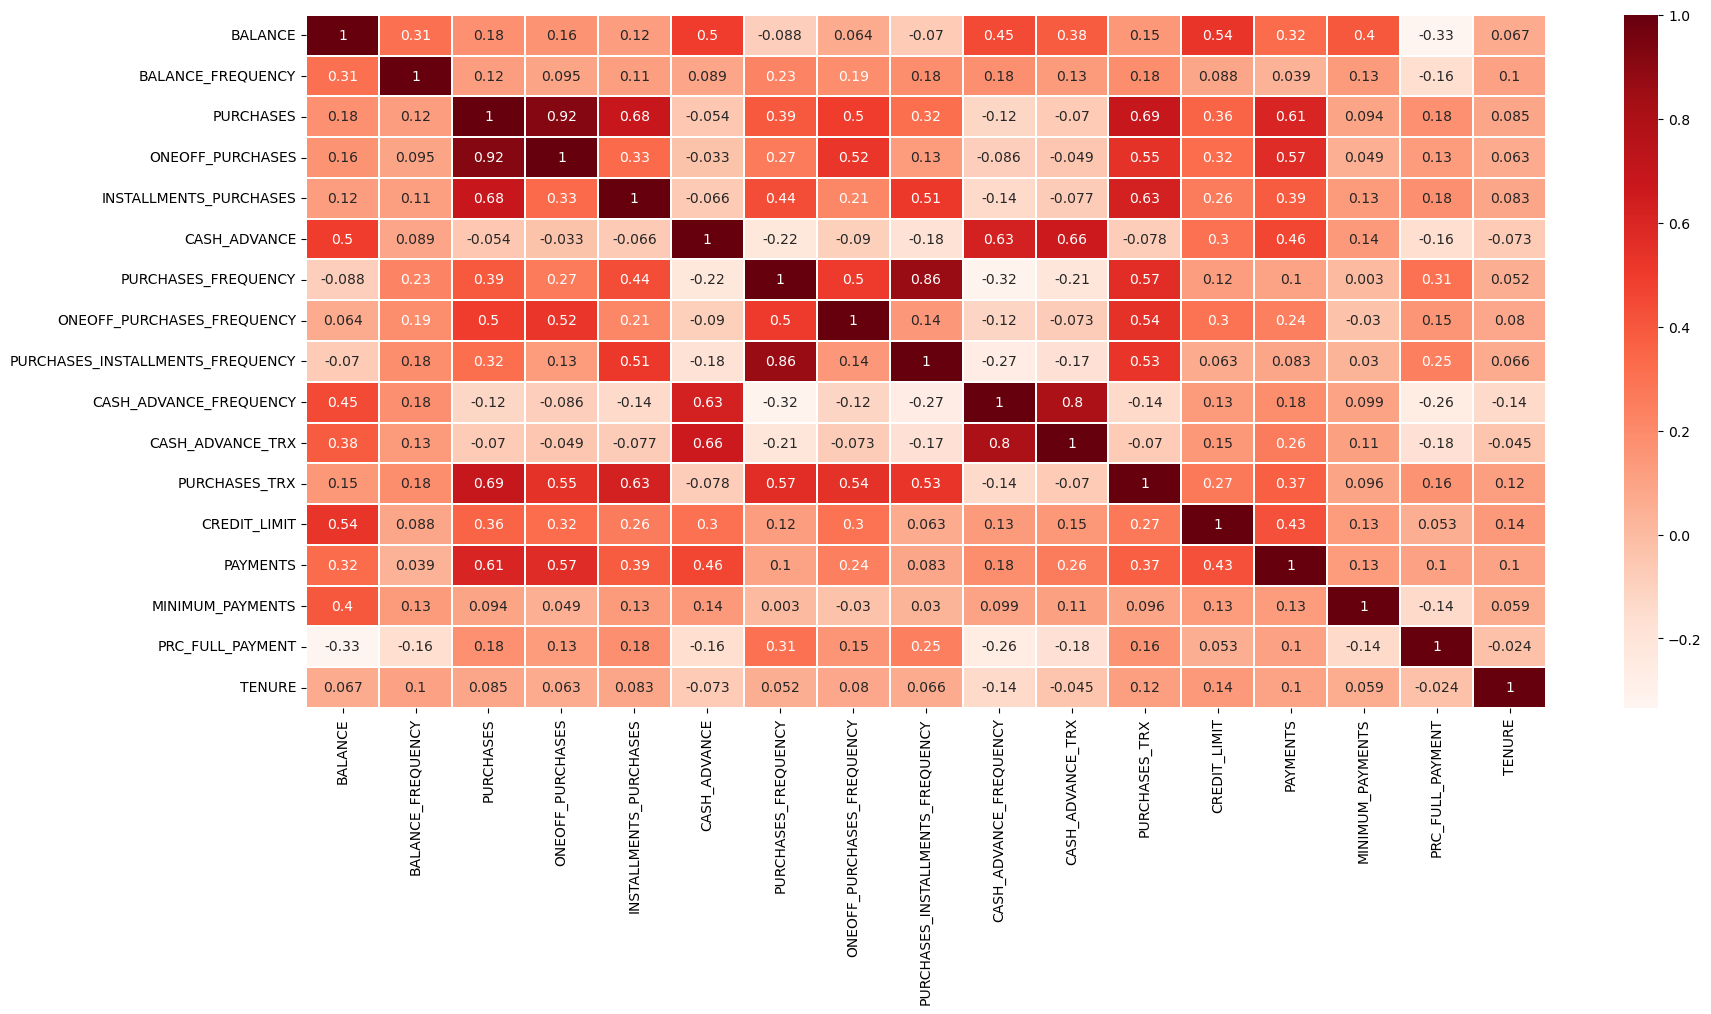

In [17]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="Reds", linewidths = 0.1, annot = True)

In [18]:
correlation = df.corr()['PURCHASES'].sort_values(ascending=False)
correlation

PURCHASES                           1.000000
ONEOFF_PURCHASES                    0.916780
PURCHASES_TRX                       0.688732
INSTALLMENTS_PURCHASES              0.679259
PAYMENTS                            0.606782
ONEOFF_PURCHASES_FREQUENCY          0.497384
PURCHASES_FREQUENCY                 0.393000
CREDIT_LIMIT                        0.358425
PURCHASES_INSTALLMENTS_FREQUENCY    0.316025
PRC_FULL_PAYMENT                    0.176447
BALANCE                             0.176083
BALANCE_FREQUENCY                   0.122635
MINIMUM_PAYMENTS                    0.093842
TENURE                              0.084545
CASH_ADVANCE                       -0.053760
CASH_ADVANCE_TRX                   -0.070277
CASH_ADVANCE_FREQUENCY             -0.124863
Name: PURCHASES, dtype: float64

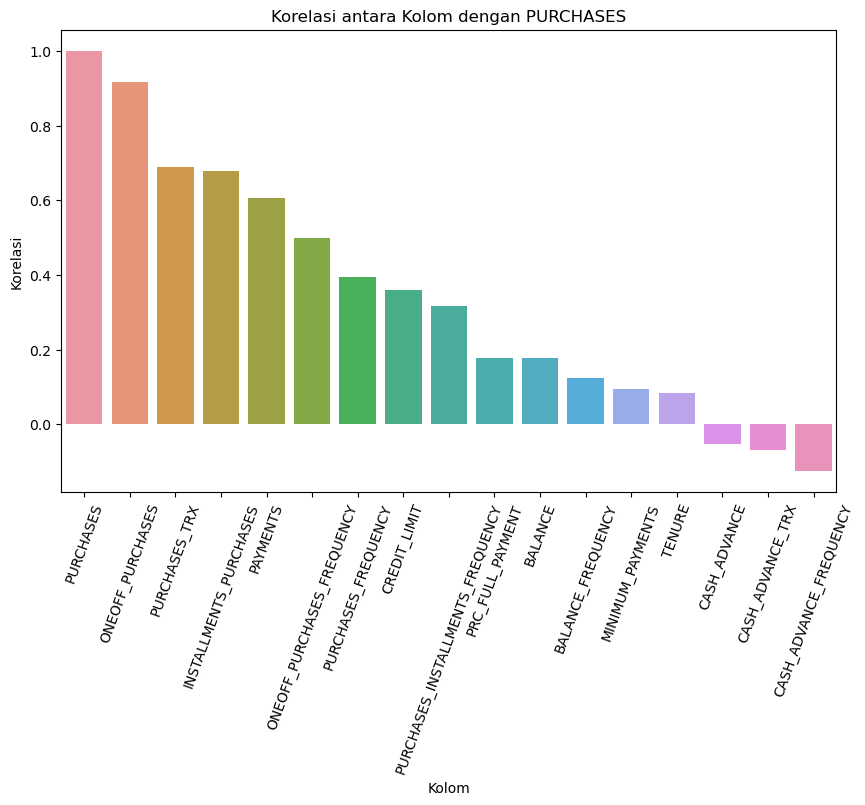

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Korelasi antara Kolom dengan PURCHASES')
plt.xlabel('Kolom')
plt.ylabel('Korelasi')
plt.xticks(rotation=70)
plt.show()

##### Ksimpulan

Dari visualisasi di atas, dapat disimpulkan bahwa terdapat korelasi yang kuat antara kolom "purchases" dan "oneoff_purchases". Hal ini menunjukkan bahwa orang-orang yang melakukan pembelian secara keseluruhan (purchases) cenderung juga melakukan pembelian tunggal (oneoff_purchases).

#### Perbandingan beberapa kolom dengan kolom tenure

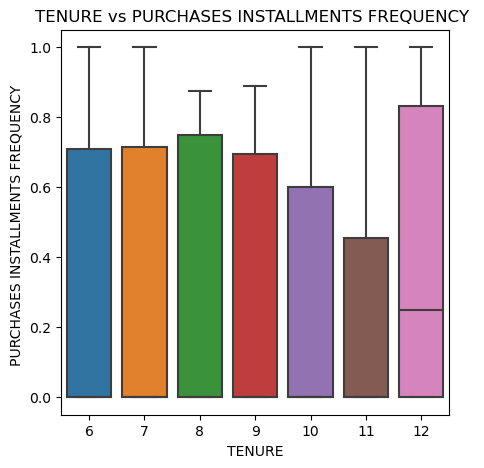

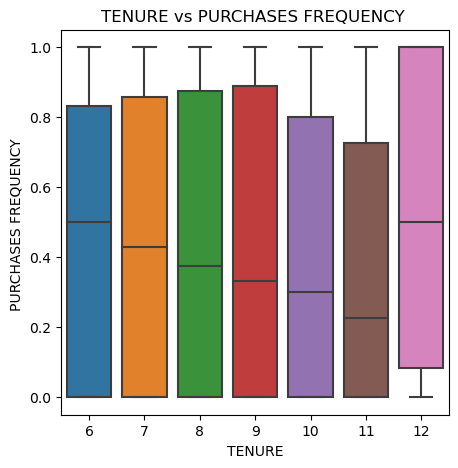

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='TENURE', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df)
plt.title('TENURE vs PURCHASES INSTALLMENTS FREQUENCY ')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES INSTALLMENTS FREQUENCY ')
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x='TENURE', y='PURCHASES_FREQUENCY', data=df)
plt.title('TENURE vs PURCHASES FREQUENCY ')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES FREQUENCY ')
plt.show()

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa pada bulan Desember, pembayaran secara angsuran terjadi paling banyak, menunjukkan bahwa bulan tersebut juga merupakan waktu di mana jangka waktu kartu kredit paling banyak digunakan untuk melakukan transaksi.

#### Membandingkan kolom kredit limit dan beberapa kolom lainnya

Text(0, 0.5, 'Credit limit')

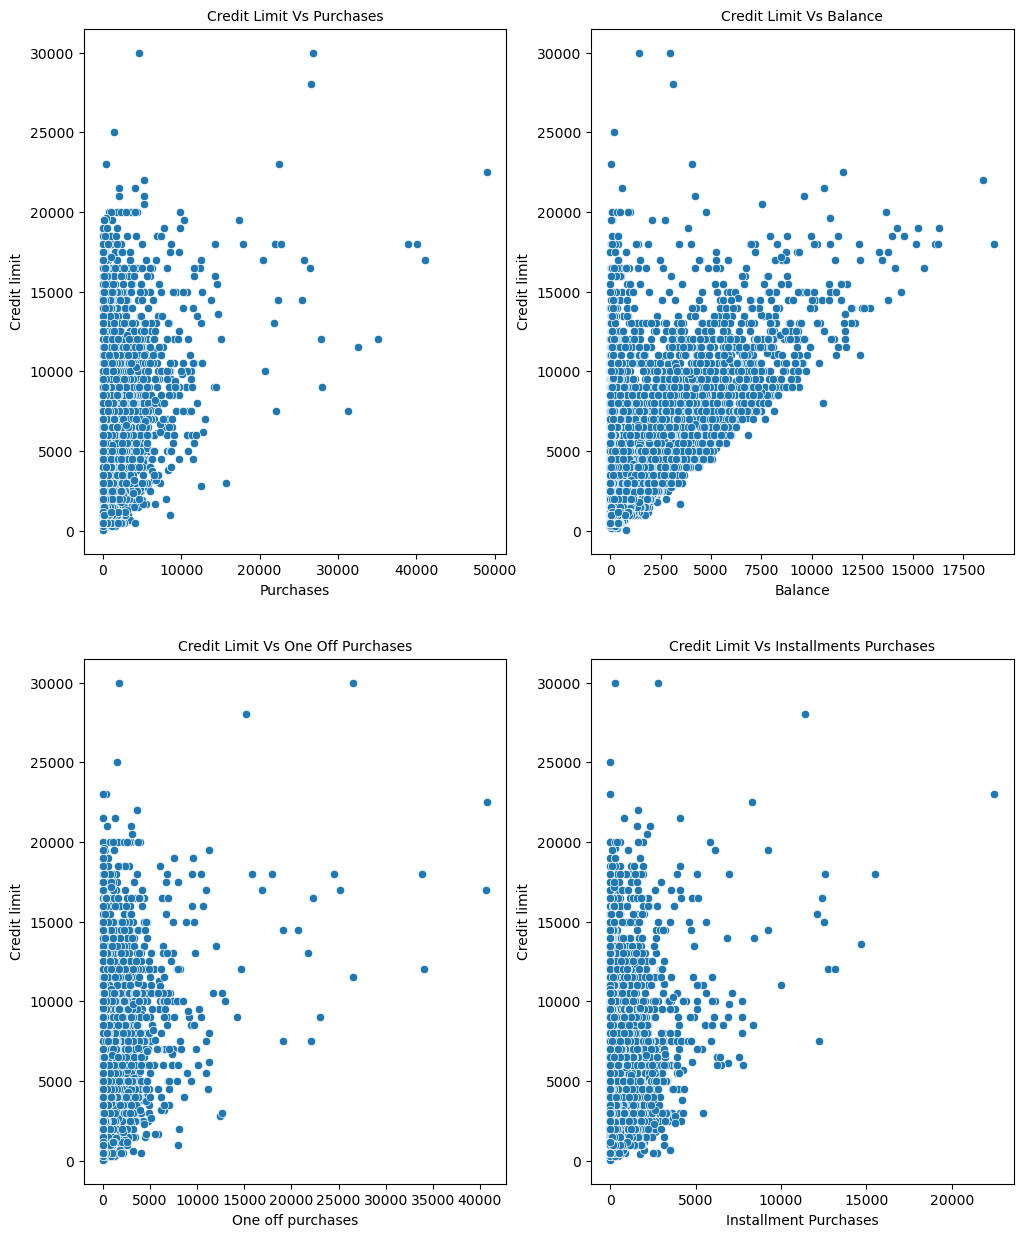

In [21]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit Vs Purchases', fontsize =10)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit Vs Balance', fontsize =10)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit Vs One Off Purchases', fontsize =10)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit Vs Installments Purchases', fontsize =10)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')


##### Kesimpulan

Dari plot diatas dapat disimpulkan bahwa, Meskipun batas kredit meningkat, jumlah pembelian cenderung tetap rendah, menunjukkan bahwa pengguna kartu kredit lebih tertarik untuk memanfaatkan kredit daripada berbelanja secara berlebihan. Namun, ada korelasi antara batas kredit dan saldo, di mana ketika batas kredit naik, saldo juga cenderung meningkat

Text(0.5, 0, 'Purchases')

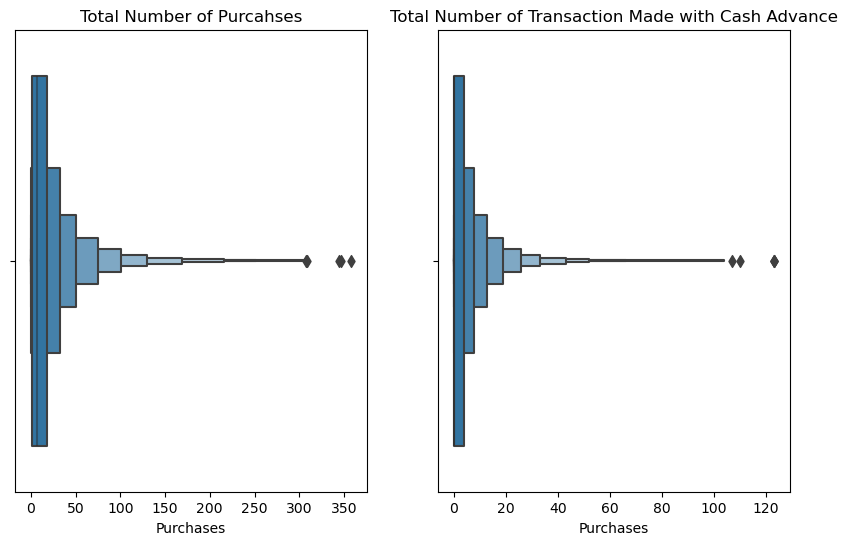

In [22]:
#ONE for purchase dan cash advance 
plt.rcParams['figure.figsize'] = (10,6)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')

##### Kesimpulan

Mayoritas pengguna kartu kredit cenderung melakukan transaksi dengan jumlah yang rendah, Hanya sedikit orang yang melakukan pembelian dalam jumlah besar,

### Deteksi Outlier

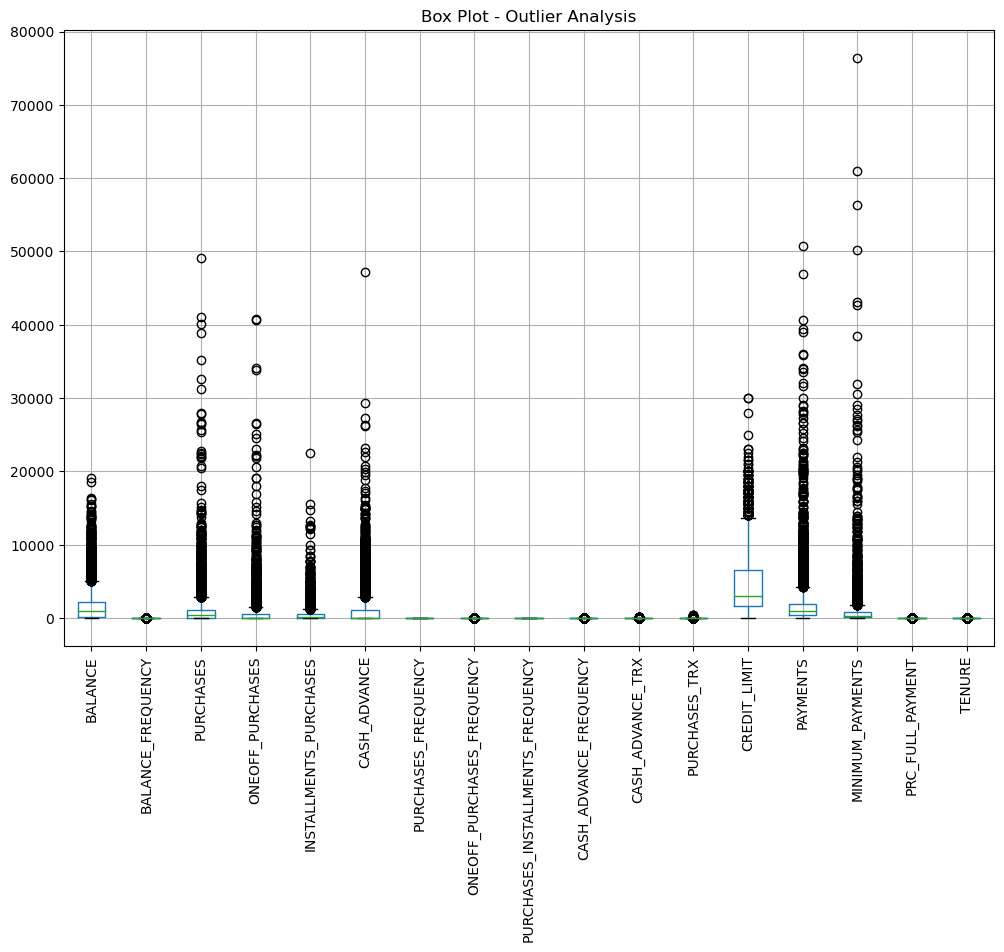

In [23]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

pada deteksi outlier pada masing-masing kolom di atas, dapat dilihat bahwa terdapat 14 kolom yang memiliki nilai outlier

### Preprocessing Data of Outlier

In [24]:
# Menghitung nilai Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk mengidentifikasi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

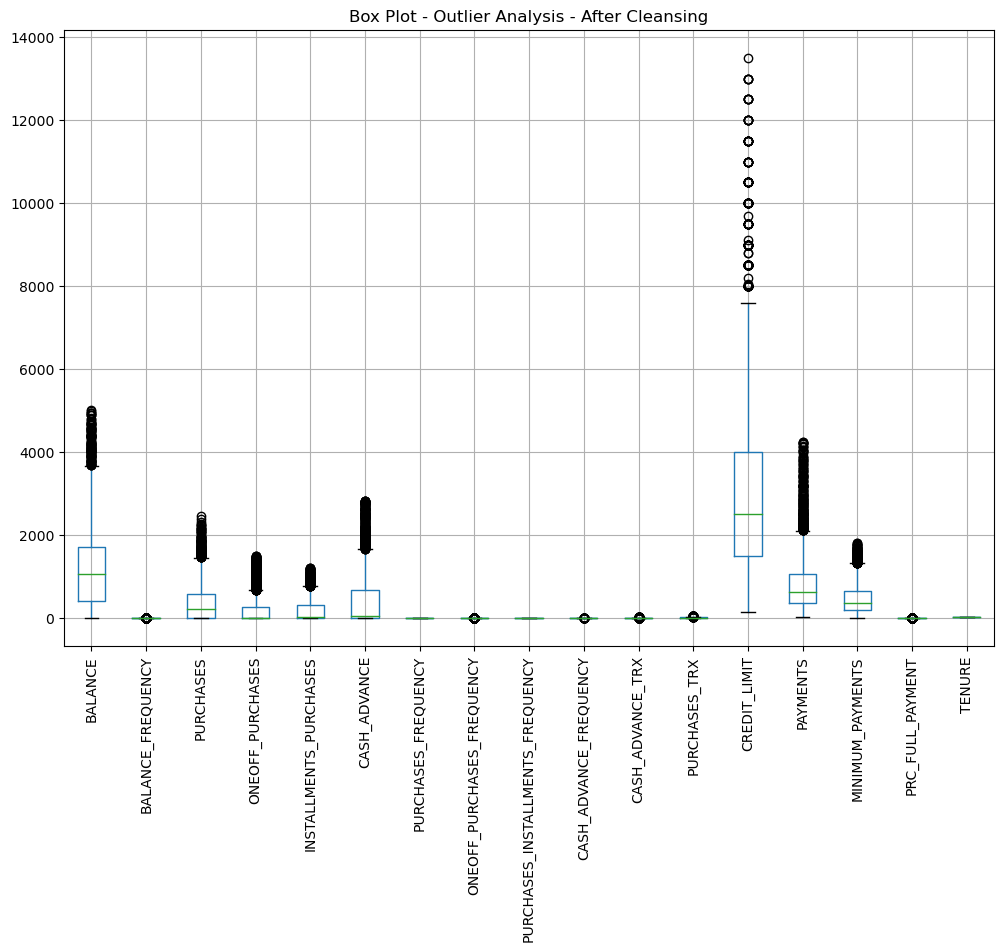

In [25]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df_no_outliers.boxplot()
plt.title('Box Plot - Outlier Analysis - After Cleansing')
plt.xticks(rotation=90)
plt.show()

setelah dilakukan pembersihan outlier pada data. kolom yang memiliki outlier masing berjumlah 14 kolom, namun outlier sudah menjadi lebih sedikit dibandingkan sebelumnya.

In [26]:
# menghitung jumlah total dan transaksi pembelian yang dilakukan pelanggan
data1 = df[['PURCHASES', 'PURCHASES_TRX']]
Query1 = data1[(data1['PURCHASES'] >= data1['PURCHASES'].median())]
Query1

,PURCHASES,PURCHASES_TRX
2,773.17,12
5,1333.28,8
6,7091.01,64
7,436.20,12
8,861.49,5
9,1281.60,3
10,920.12,12
11,1492.18,6
12,3217.99,26
13,2137.93,26


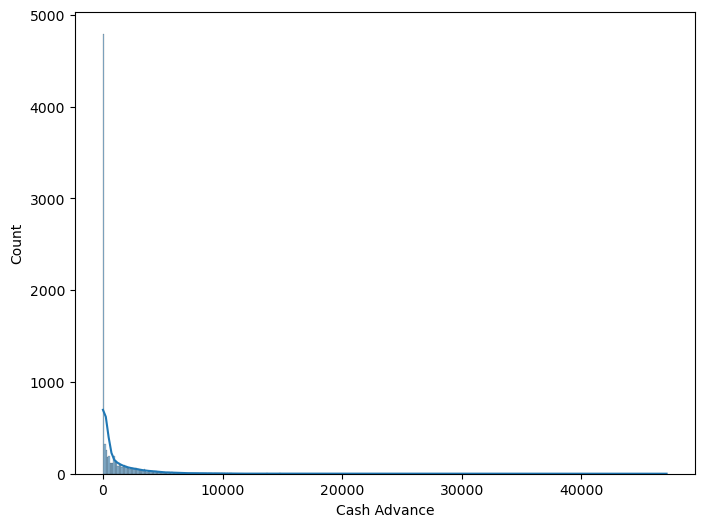

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='CASH_ADVANCE', kde=True)
plt.xlabel('Cash Advance')
plt.ylabel('Count')
plt.show()

Histogram ini digunakan untuk melihat distribusi jumlah uang tunai yang ditarik oleh pelanggan. Dapat dilihat pada plot di atas bahwa pelanggan yang menarik uang secara tunai cenderung lebih sedikit

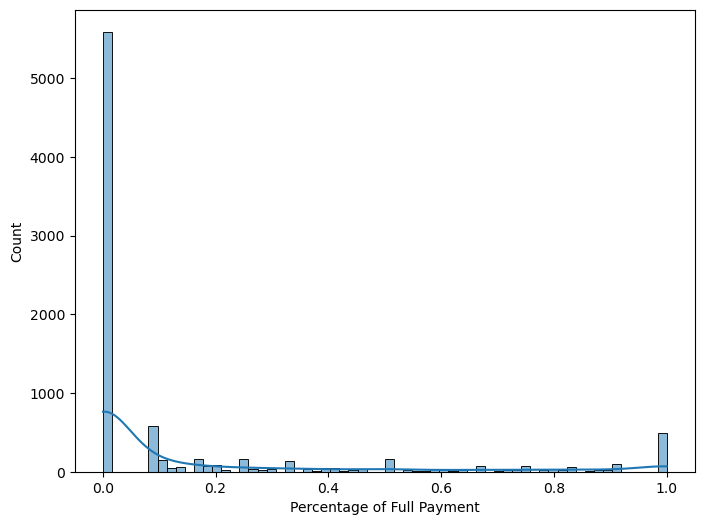

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PRC_FULL_PAYMENT', kde=True)
plt.xlabel('Percentage of Full Payment')
plt.ylabel('Count')
plt.show()


Pada kolom PRC_FULL_PAYMENT, jika nilai semakin mendekati 1 artinya semakin tinggi persentase pelanggan melakukan pembayaran penuh pada kartu kredit (tidak menyicil/melakukan pembayaran minimum)

Pada histogram di atas dapat dilihat nilai 0 sangat jauh lebih tinggi daripada nilai yang mendekati 1, hal ini dapat dilihat bahwa sangat banyak pelanggan yaitu lebih dari 5000 yang membayar secara cicilan dan kurang dari 1000 yang membayar penuh

# Pelatihan Model

In [29]:
X = df.iloc[:,[13,1]]
X = X.values

menggunakan iloc untuk memilih semua baris dan indeks kolom ke 13 dan 1 yaitu Credit Limit dan Balance

# Model Inference

In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Menggunakan KMeans akan dibagi cluster pada data menjadi 4

Kemudian, dari KMeans tersebut akan dilakukan fit_predict dengan mengelompokkan X yang telah dibentuk ke dalam klaster yang sesuai

# Modeling

# 1

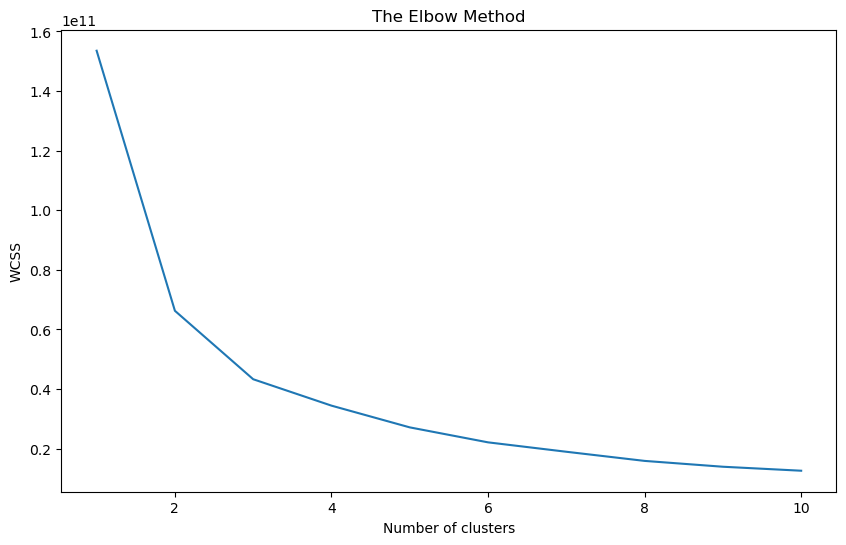

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Plot di atas digunakan untuk melihat jumlah klaster yang optimal dengan mempertimbangkan 'elbow' pada penurunan

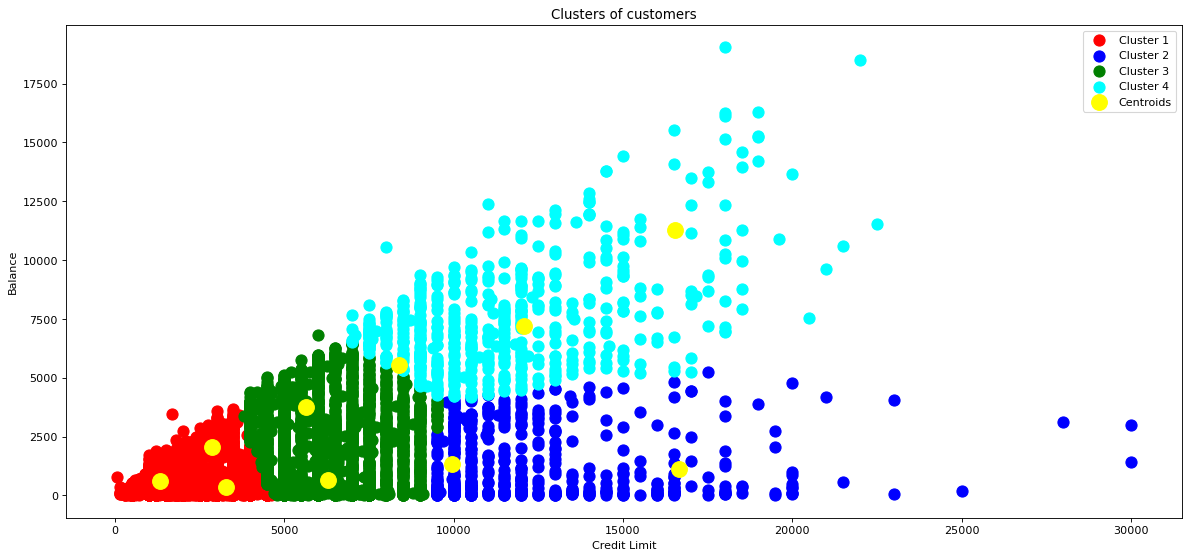

In [32]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()


Kode di atas akan membuat klaster klaster yang diambil pada nilai X yang telah di-declare di atas dengan warna yang berbeda-beda dan memberikan **Centroid** atau pusat klaster dengan warna kuning

In [33]:
from sklearn.metrics import silhouette_score

# X: data yang telah di-klustering

# Inisialisasi objek K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Melakukan clustering
labels = kmeans.fit_predict(X)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5195712370383095


Silhouette Score digunakan untuk mengevaluasi klaster yang dibentuk dengan KMeans. Jika mendekati 1 maka memiliki kedekatan/kemiripan dengan klaster yang dimaksud sedangkan jika mendekati -1, maka berada pada klaster yang berbeda

Pada score dengan pengujian pertama pada Credit Limit dan Balance dapat dilihat bahwa hasil yang didapatkan cukup baik

# 2

In [34]:
X = df.iloc[:,[3,14]]
X=X.values

menggunakan iloc untuk memilih semua baris dan indeks kolom ke 3 dan 14 yaitu Purchases dan Payments

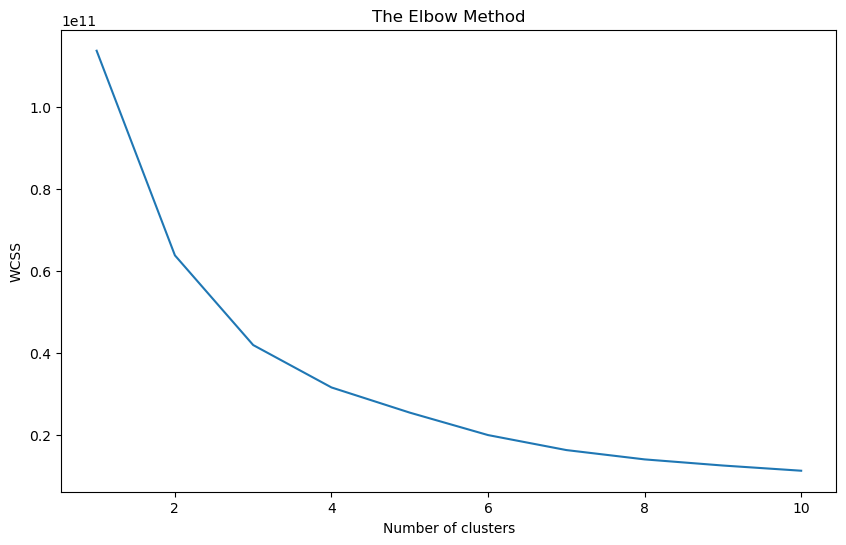

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

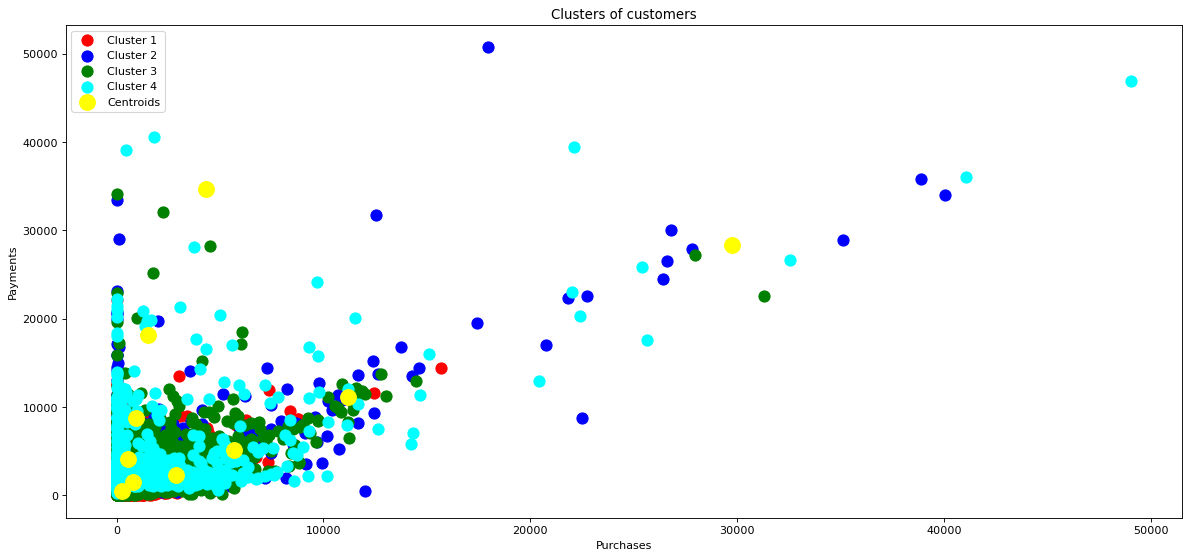

In [36]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

# X: data yang telah di-klustering

# Inisialisasi objek K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Melakukan clustering
labels = kmeans.fit_predict(X)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6523335638102132


Pada score dengan pengujian kedua menggunakan Purchases dan Payment dapat dilihat bahwa hasil yang didapatkan meningkat dibandingkan pengujian pertama

Hal ini dapat menjadi pertimbangan bahwa kemungkinan klaster pada pengujian data ini beberapa sudah sedikit tepat

# 3

In [38]:
X = df.iloc[:,[1,14]]
X = X.values

menggunakan iloc untuk memilih semua baris dan indeks kolom ke 1 dan 14 yaitu Balance dan Payments

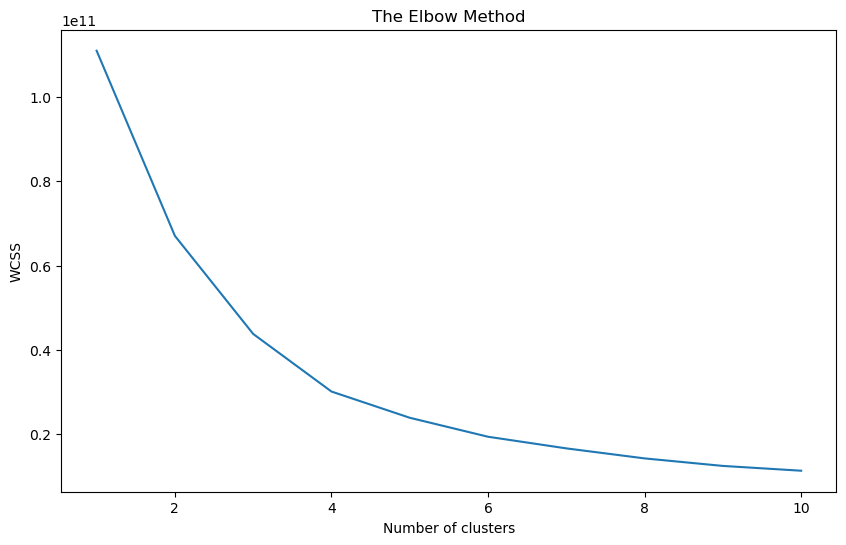

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

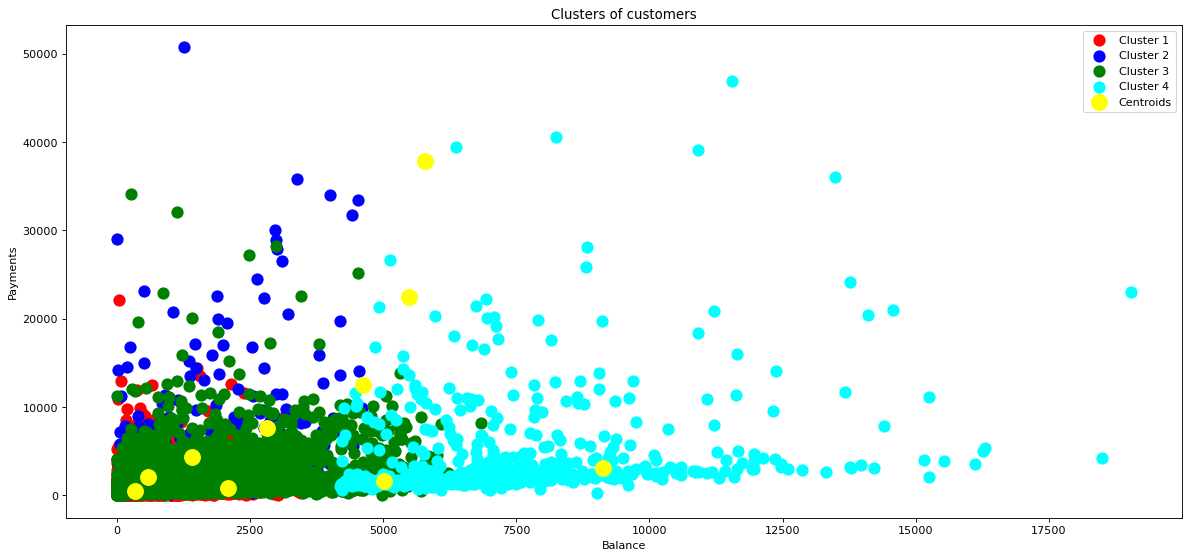

In [40]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Balance')
plt.ylabel('Payments')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

# X: data yang telah di-klustering

# Inisialisasi objek K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Melakukan clustering
labels = kmeans.fit_predict(X)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.622269108309083


Pada score dengan pengujian ketiga menggunakan Balance dan Payment dapat dilihat bahwa hasil yang didapatkan meningkat dibandingkan pengujian pertama, namun sedikit lebih rendah dibandingkan pengujian kedua

# Kesimpulan

Dari final projek yang telah dilakukan, dapat disimpulkan beberapa hal penting tentang dataset yang digunakan. Pertama, dataset tersebut terdiri dari 18 kolom dan 8950 baris data. Setelah melakukan proses data loading, dilakukan eksplorasi data dengan menggunakan berbagai teknik visualisasi seperti histogram, scatter plot, dan box plot.

Beberapa visualisasi yang dilakukan adalah untuk melihat distribusi dari setiap kolom dalam dataset, serta untuk menganalisis korelasi antar kolom. Selain itu, dilakukan perbandingan antara kolom tenure dengan beberapa kolom lainnya, serta perbandingan antara kolom kredit limit dengan beberapa kolom lainnya. Hal ini bertujuan untuk memahami hubungan dan pola yang mungkin terjadi antara variabel-variabel tersebut.

Selain itu, dalam final projek ini juga dilakukan perhitungan jumlah total dan transaksi pembelian yang dilakukan oleh pelanggan. Dalam analisis ini, terdapat beberapa korelasi yang menarik antara variabel-variabel tertentu. Misalnya, terdapat korelasi sebesar 52% antara Credit Limit dan Balance, 65% antara Purchases dan Payment, serta 62% antara Balance dan Payment. Hal ini menunjukkan adanya hubungan yang signifikan antara variabel-variabel tersebut.
